#### Dataset 

In [4]:
import tensorflow
NUM_WORDS=1000
INDEX_FROM=3  

train,test = tensorflow.keras.datasets.imdb.load_data(num_words=NUM_WORDS, index_from=INDEX_FROM)
train_x,train_y = train
test_x,test_y = test

word_to_id = keras.datasets.imdb.get_word_index()
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3

id_to_word = {value:key for key,value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in train_x[0] ))
print(' '.join(id_to_word[id] for id in train_x[1] ))
print(' '.join(id_to_word[id] for id in train_x[2] ))

<START> this film was just brilliant casting <UNK> <UNK> story direction <UNK> really <UNK> the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same <UNK> <UNK> as myself so i loved the fact there was a real <UNK> with this film the <UNK> <UNK> throughout the film were great it was just brilliant so much that i <UNK> the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the <UNK> <UNK> was amazing really <UNK> at the end it was so sad and you know what they say if you <UNK> at a film it must have been good and this definitely was also <UNK> to the two little <UNK> that played the <UNK> of <UNK> and paul they were just brilliant children are often left out of the <UNK> <UNK> i think because the stars that play them all <UNK> up are such a big <UNK> for the whole film but these children are amazing and should be <UNK> for what they have done don't yo

#### Activation Function 
* Softmax:

    $ softmax(x) = \frac{e^{x_i}}{\sum_{j=1}e^{x_j}}$
* Tanh:

    $Tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$

In [34]:
sample = [3.0,1.0,2.0]

def softmax(x): 
    return np.exp(x) / np.sum(np.exp(x),axis = 0 ) 
softmax(sample)    
def tanh(x):
    return np.tanh(x)
print("Softmax: ",softmax(sample))
print("Tanh: ",tanh(sample))

Softmax:  [0.66524096 0.09003057 0.24472847]
Tanh:  [0.99505475 0.76159416 0.96402758]


#### Loss function : Cross Entropy Loss

$L(p,q) = -\sum_ip_ilog(q_i)$


* Binary Cross-Entropy Loss: 

    $L = \frac{1}{N}\sum_{i=1}^{N}(y_ilog(p_i) + (1-y_i)log(1 - p_i))$

* Multi Class : 

    $ L = -\frac{1}{N}\sum_{i=1}^{N}\sum_{j=1}^{C}y_{ij}log(p_{ij})$


In [ ]:
class CrossEntropy:
    def __init__(self,type_ = "binary"):
        self.type = type_
    def forward(self,y_pred,y):
        self.y = y 
        self.y_pred = y_pred
        if self.type == 'binary'
            _loss =  -y * np.log(self.y_pred)
            loss = np.sum(_loss,axis = 0).mean()
            return np.squeeze(loss)
        else: 
            



#### Optimize - SGD (momentum)

$\begin{aligned}
    v_{t+1} & = \beta * v_{t} + (1 - \beta) * g_{t+1}, \\
    w_{t+1} & = w_{t} - \text{lr} * v_{t+1},
\end{aligned}$


In [ ]:
class SGD:
    def __init__(self,lr = 0.05,beta = 0.9):
        self.lr = 0.05
        self.beta = 0.9
    def optimize(self,weights,gradient,vel = None):
        if vel is None: 
            vel = [0 for w in weights]
        vel = self._update_vel(
            gradient,self.beta,vel
        )
        new_weight = []

        for w,vel in zip (weights, vel):
            w -=self.lr * vel 
            new_weight.append(w)
        return new_weight,vel
    def _update_vel(self,gradient,beta,vel):
        new_vel = []
        for gradient,vel in zip(gradient,vel):
            new_vel = beta * vel + (1-beta) * gradient 
            new_vel.append(new_vel)
        return new_vel

#### Model - RNN 

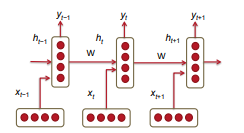

* Hidden State : 
    $h_t = \sigma(W^{(hh)}h_{t-1} + W^{(hx)}x_{[t]} + bx)$
    
* Y Predict : 
    $\hat{y} = softmax(W^{(S)}h_t + by)$

In [ ]:
class RNN:
    def __init__(self,input_dim,output_dim,hidden_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim 
        self.hidden_dim = hidden_dim 
    def _init_param(self):
        w_y = np.random.rand(output_dim,hidden_dim) 
        by = np.zeros((ouptut_dim,1))
        w_hx = np.random.randn(hidden_dim,input_dim) 
        w_hh = np.random.rand(hidden_dim,hidden_dim)
        bx = p.zeros(hidden_dim,1)

        return w_y,w_hx,w_hh,bx,by 
    
    def forward(self,x):
        """
        """

        self.x = x 
        self.layers_tanh = [Tanh() for i in x]
        hidden = np.zeros((self.hidden_dim,1))
        self.hidden_list = [hidden]
        self.y_pred = []

        for i,act in zip(x,self.layers_tanh):
            h = tanh(np.dot(self.Whx,x) + np.dot(self.Whh,hidden) + self.bx)
            y = softmax(np.dot(Ws,hidden) + self.by )
        return self.y
    def loss(self,y):
        self.y = y 
        self.layers_loss = [CrossEntropy() for y in self.y]
        cost = 0 
        for y_pred, y, layer in zip(Self.y_pred,self.y,self.layers):
            cost += layer.forward(y_pred,y)
            
    def backward(self):
        pass 
    def optimize(self):
        pass

#### Training 

In [ ]:
## HyperParameter 
num_epochs = .. 
input_dim = ..
output_dim = ..
hidden_dim = .. 



In [ ]:
model = RNN()
opt = SGD()
loss = CrossEntropy() 

In [ ]:
for epoch in range(num_epochs):
    y_ pred = model.forward(x)
    loss = model.loss(y,y_pred)
    model.backward()
    model.optimize()
    
    if epochs % 5 == 0:
        print("--------------")
        

#### Infer 